<a href="https://colab.research.google.com/github/Vish-gi/Machine-Learning-Lab-Test-1/blob/main/Vishvasri_123_ML_Test_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix:
[[ 8  6]
 [ 6 58]]


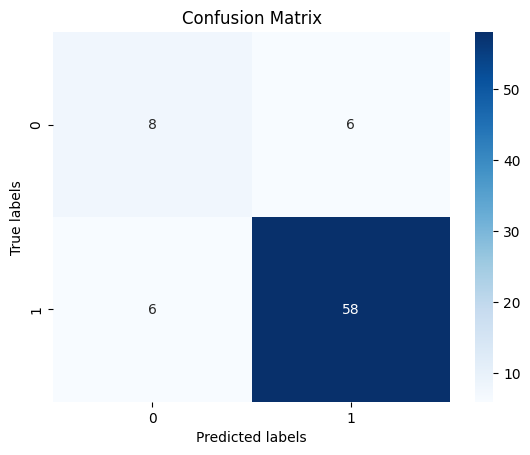

Precision: 0.5714285714285714
Recall: 0.5714285714285714
Accuracy: 0.8461538461538461
F-Measure: 0.5714285714285714


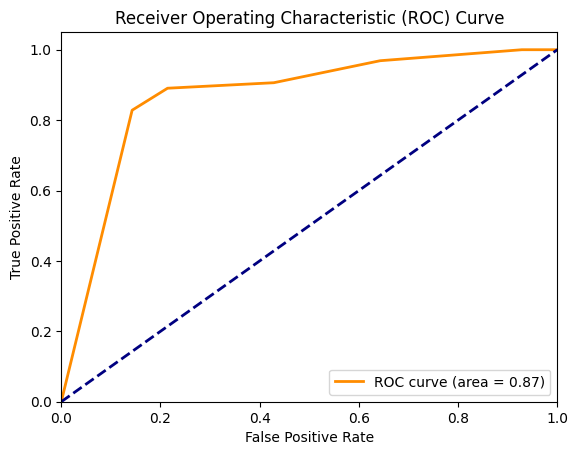

In [33]:
#QUESTION 2
#KNN MODEL


#Importing the needed packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Loading the online foods dataset

data = pd.read_csv('/content/onlinefoods.csv')
data = data.drop('Unnamed: 12', axis=1)

# Separating features and targets

X = data.iloc[:, :-1].values #Feature values
y = data.iloc[:, 11].values #Target values

# Encoding categorical variables into numerical representations

labelEncoder_X = LabelEncoder()
labelEncoder_y = LabelEncoder()
X[:, 1] = labelEncoder_X.fit_transform(X[:, 1])
X[:, 2] = labelEncoder_X.fit_transform(X[:, 2])
X[:, 3] = labelEncoder_X.fit_transform(X[:, 3])
X[:, 4] = labelEncoder_X.fit_transform(X[:, 4])
X[:, 5] = labelEncoder_X.fit_transform(X[:, 5])
X[:, 10] = labelEncoder_X.fit_transform(X[:, 10])
y = labelEncoder_y.fit_transform(y)

# One hot encoding
ct = ColumnTransformer([("Gender", OneHotEncoder(), [1, 2, 3, 4, 5, 10])], remainder="passthrough")
X = ct.fit_transform(X)

# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Applying KNN model
classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


precision = cm[0][0] / (cm[0][0] + cm[1][0])  # True positive / (True positive + False positive)
recall = cm[0][0] / (cm[0][0] + cm[0][1])  # True positive / (True positive + False negative)
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])  # (True positive + True negative) / Total
f_measure = 2 * precision * recall / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F-Measure:", f_measure)

# ROC Curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting of curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#CLUSTERING (KNN)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


data = pd.read_csv('/content/onlinefoods.csv')
data = data.drop('Unnamed: 12', axis=1)


X = data.iloc[:, :-1].values


labelEncoder_X = LabelEncoder()
X[:, 1] = labelEncoder_X.fit_transform(X[:, 1])
X[:, 2] = labelEncoder_X.fit_transform(X[:, 2])
X[:, 3] = labelEncoder_X.fit_transform(X[:, 3])
X[:, 4] = labelEncoder_X.fit_transform(X[:, 4])
X[:, 5] = labelEncoder_X.fit_transform(X[:, 5])
X[:, 10] = labelEncoder_X.fit_transform(X[:, 10])


ct = ColumnTransformer([("Gender", OneHotEncoder(), [1, 2, 3, 4, 5, 10])], remainder="passthrough")
X_encoded = ct.fit_transform(X)

# Feature scaling
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X_encoded)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Evaluating Performance
silhouette_avg = silhouette_score(X_scaled, clusters)
davies_bouldin = davies_bouldin_score(X_scaled, clusters)

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Score:", davies_bouldin)


Silhouette Score: 0.2093731794456095
Davies-Bouldin Score: 2.5207054912257054


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Confusion Matrix:
[[ 4 10]
 [ 5 59]]


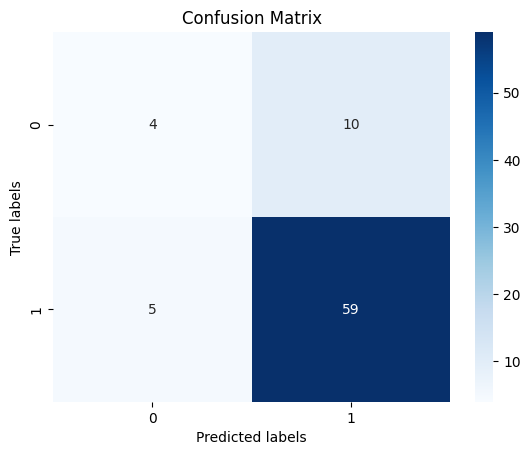

Precision: 0.4444444444444444
Recall: 0.2857142857142857
Accuracy: 0.8076923076923077
F-Measure: 0.34782608695652173


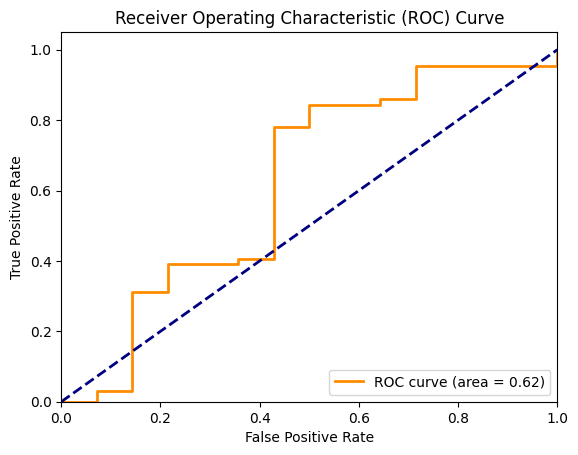

In [ ]:
#PLA MODEL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns


data = pd.read_csv('/content/onlinefoods.csv')
data = data.drop('Unnamed: 12', axis=1)


X = data.iloc[:, :-1].values
y = data.iloc[:, 11].values


labelEncoder_X = LabelEncoder()
labelEncoder_y = LabelEncoder()
X[:, 1] = labelEncoder_X.fit_transform(X[:, 1])
X[:, 2] = labelEncoder_X.fit_transform(X[:, 2])
X[:, 3] = labelEncoder_X.fit_transform(X[:, 3])
X[:, 4] = labelEncoder_X.fit_transform(X[:, 4])
X[:, 5] = labelEncoder_X.fit_transform(X[:, 5])
X[:, 10] = labelEncoder_X.fit_transform(X[:, 10])
y = labelEncoder_y.fit_transform(y)


ct = ColumnTransformer([("Gender", OneHotEncoder(), [1, 2, 3, 4, 5, 10])], remainder="passthrough")
X = ct.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


classifier = Perceptron()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

precision = cm[0][0] / (cm[0][0] + cm[1][0])
recall = cm[0][0] / (cm[0][0] + cm[0][1])
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
f_measure = 2 * precision * recall / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F-Measure:", f_measure)


y_pred_proba = classifier.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
[[11  3]
 [ 9 55]]


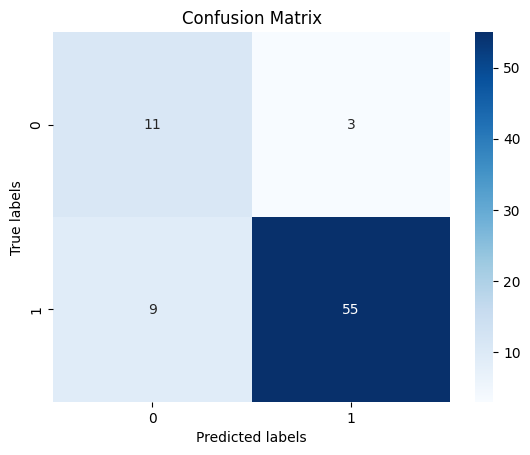

Precision: 0.55
Recall: 0.7857142857142857
Accuracy: 0.8461538461538461
F-Measure: 0.6470588235294117


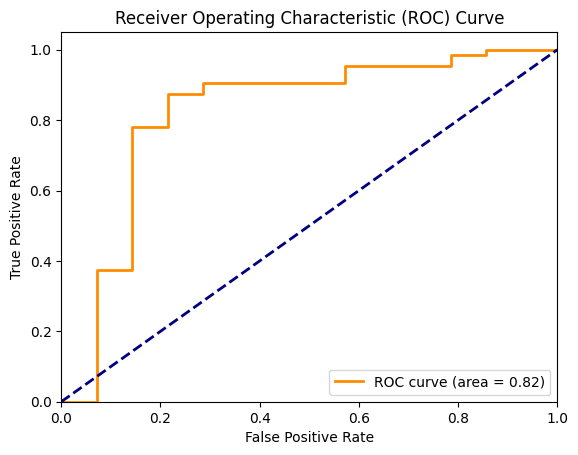

In [ ]:
#SVM


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns


data = pd.read_csv("/content/onlinefoods.csv")
data = data.drop('Unnamed: 12', axis=1)

# Separating X and y
X = data.iloc[:, :-1].values
y = data.iloc[:, 11].values


labelEncoder_X = LabelEncoder()
labelEncoder_y = LabelEncoder()
X[:, 1] = labelEncoder_X.fit_transform(X[:, 1])
X[:, 2] = labelEncoder_X.fit_transform(X[:, 2])
X[:, 3] = labelEncoder_X.fit_transform(X[:, 3])
X[:, 4] = labelEncoder_X.fit_transform(X[:, 4])
X[:, 5] = labelEncoder_X.fit_transform(X[:, 5])
X[:, 10] = labelEncoder_X.fit_transform(X[:, 10])
y = labelEncoder_y.fit_transform(y)


ct = ColumnTransformer([("Gender", OneHotEncoder(), [1, 2, 3, 4, 5, 10])], remainder="passthrough")
X = ct.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fitting SVM classifier to the Training set
classifier = SVC(kernel='linear', random_state=0, probability=True)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


precision = cm[0][0] / (cm[0][0] + cm[1][0])
recall = cm[0][0] / (cm[0][0] + cm[0][1])
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
f_measure = 2 * precision * recall / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F-Measure:", f_measure)

# ROC Curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv("/content/onlinefoods.csv")
data = data.drop('Unnamed: 12', axis=1)


X = data.iloc[:, :-1].values
y = data.iloc[:, 11].values


labelEncoder_X = LabelEncoder()
labelEncoder_y = LabelEncoder()
X[:, 1] = labelEncoder_X.fit_transform(X[:, 1])
X[:, 2] = labelEncoder_X.fit_transform(X[:, 2])
X[:, 3] = labelEncoder_X.fit_transform(X[:, 3])
X[:, 4] = labelEncoder_X.fit_transform(X[:, 4])
X[:, 5] = labelEncoder_X.fit_transform(X[:, 5])
X[:, 10] = labelEncoder_X.fit_transform(X[:, 10])
y = labelEncoder_y.fit_transform(y)


ct = ColumnTransformer([("Gender", OneHotEncoder(), [1, 2, 3, 4, 5, 10])], remainder="passthrough")
X = ct.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.11248650096494565
R-squared: 0.23619657157284635


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix:
[[ 7  7]
 [ 4 60]]


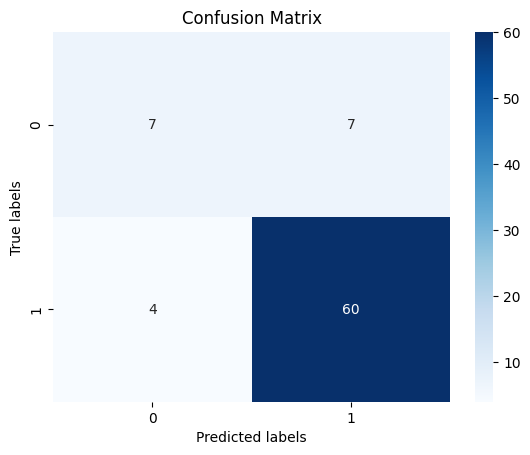

Precision: 0.6363636363636364
Recall: 0.5
Accuracy: 0.8589743589743589
F-Measure: 0.56


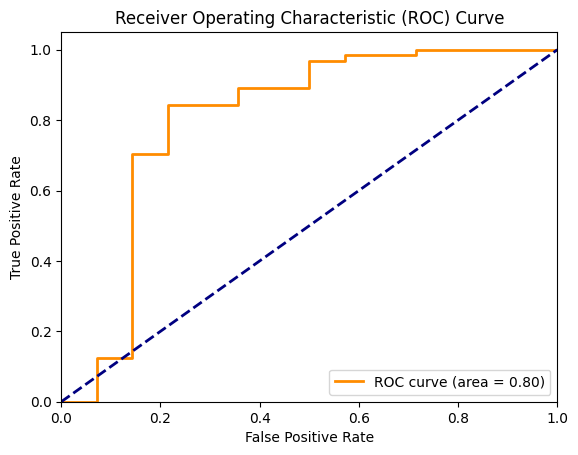

In [ ]:
#MULTI LAYER PERCEPTRON

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns


data = pd.read_csv("/content/onlinefoods.csv")
data = data.drop('Unnamed: 12', axis=1)


X = data.iloc[:, :-1].values
y = data.iloc[:, 11].values


labelEncoder_X = LabelEncoder()
labelEncoder_y = LabelEncoder()
X[:, 1] = labelEncoder_X.fit_transform(X[:, 1])
X[:, 2] = labelEncoder_X.fit_transform(X[:, 2])
X[:, 3] = labelEncoder_X.fit_transform(X[:, 3])
X[:, 4] = labelEncoder_X.fit_transform(X[:, 4])
X[:, 5] = labelEncoder_X.fit_transform(X[:, 5])
X[:, 10] = labelEncoder_X.fit_transform(X[:, 10])
y = labelEncoder_y.fit_transform(y)


ct = ColumnTransformer([("Gender", OneHotEncoder(), [1, 2, 3, 4, 5, 10])], remainder="passthrough")
X = ct.fit_transform(X)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fitting MLP classifier to the Training set
classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


precision = cm[0][0] / (cm[0][0] + cm[1][0])
recall = cm[0][0] / (cm[0][0] + cm[0][1])
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
f_measure = 2 * precision * recall / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F-Measure:", f_measure)

# ROC Curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
[[13  1]
 [44 20]]


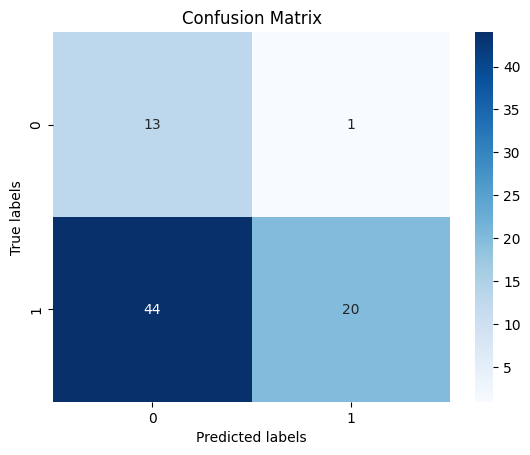

Precision: 0.22807017543859648
Recall: 0.9285714285714286
Accuracy: 0.4230769230769231
F-Measure: 0.3661971830985915


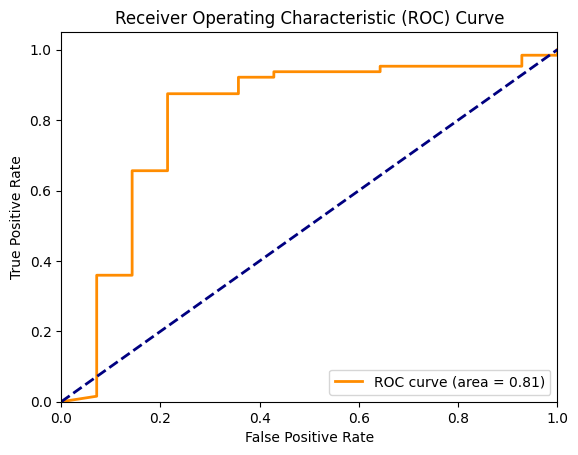

In [ ]:
#NAIVE BAYES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns


data = pd.read_csv("/content/onlinefoods.csv")
data = data.drop('Unnamed: 12', axis=1)


X = data.iloc[:, :-1].values
y = data.iloc[:, 11].values


labelEncoder_X = LabelEncoder()
labelEncoder_y = LabelEncoder()
X[:, 1] = labelEncoder_X.fit_transform(X[:, 1])
X[:, 2] = labelEncoder_X.fit_transform(X[:, 2])
X[:, 3] = labelEncoder_X.fit_transform(X[:, 3])
X[:, 4] = labelEncoder_X.fit_transform(X[:, 4])
X[:, 5] = labelEncoder_X.fit_transform(X[:, 5])
X[:, 10] = labelEncoder_X.fit_transform(X[:, 10])
y = labelEncoder_y.fit_transform(y)


ct = ColumnTransformer([("Gender", OneHotEncoder(), [1, 2, 3, 4, 5, 10])], remainder="passthrough")
X = ct.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fitting Naive Bayes classifier to the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


precision = cm[0][0] / (cm[0][0] + cm[1][0])
recall = cm[0][0] / (cm[0][0] + cm[0][1])
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
f_measure = 2 * precision * recall / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F-Measure:", f_measure)

# ROC Curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


INFERENCE: Multi Layer Perceptron has the highest accuracy (0.8589743589743589) The confusion matrix provides information about the performance of the classifier. It shows the number of true positives, true negatives, false positives, and false negatives. From the confusion matrix, you can evaluate the model's performance in terms of precision, recall, accuracy, and F-measure.

The ROC curve illustrates the performance of a classifier across various threshold settings. It plots the true positive rate (sensitivity) against the false positive rate (1-specificity) for different threshold values